## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [38]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [39]:
#Reading file ab_data.csv

df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [40]:
#Displaying number of rows in the dataset

df.shape[0]

294478

c. The number of unique users in the dataset.

In [41]:
#Displaying number of unique users in the dataset

df.nunique()['user_id']

290584

d. The proportion of users converted.

In [42]:
#Displaying the proportion of users converted

print("Converted users proportion is "+str(df['converted'].mean()*100))

Converted users proportion is 11.9659193556


e. The number of times the `new_page` and `treatment` don't line up.

In [43]:
#Displaying the number of times the new_page and treatment don't line up

line_up1=df.query('group=="treatment" & landing_page=="old_page"')['user_id'].count()
line_up2=df.query('group=="control" & landing_page=="new_page"')['user_id'].count()
line_up=line_up1+line_up2
print("The number of times the new_page and treatment don't line up is ="+str(line_up))

The number of times the new_page and treatment don't line up is =3893


f. Do any of the rows have missing values?

In [44]:
df.info()
print("There are no missing values in the dataset")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
There are no missing values in the dataset


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [45]:
#Creating new dataset df2 which meets specifications
df.drop(df.query('group == "treatment" and landing_page == "old_page"').index, inplace=True)
df.drop(df.query('group == "control" and landing_page == "new_page"').index, inplace=True)
df2=df

In [46]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [47]:
#Displaying unique users of new datset

a=df2.nunique()['user_id']
print("There are "+str(a)+" unique users in the new dataset")

There are 290584 unique users in the new dataset


b. There is one **user_id** repeated in **df2**.  What is it?

In [48]:
#Displaying repeated user_id 

df_repeat=df2[df2['user_id'].duplicated()]['user_id'].values
print("Repeated user_id is "+str(df_repeat[0]))

Repeated user_id is 773192


c. What is the row information for the repeat **user_id**? 

In [49]:
#Displaying row information for the repeat user_id

df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [50]:
#Removing rows with a duplicate user_id

df2.drop(2893,inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [51]:
#Displaying probability of an individual converting regardless of the page they receive

prob=df2['converted'].mean()
print("Probability of an individual converting regardless of the page they receive is "+str(prob))

Probability of an individual converting regardless of the page they receive is 0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [52]:
#Displaying the probability of the individual which is in control group and they converted

df_group=df2.groupby('group')
df_group.describe()
a=0.120386
b=0.118808
#The probability of the individual which is in control group and they converted is 0.120386

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [53]:
##Displaying the probability of the individual which is in treatment group and they converted

df_group=df2.groupby('group')
df_group.describe()
#The probability of the individual which is in treatment group and they converted is is 0.118808

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145310.0  0.118808  0.323564  0.0  0.0  0.0  0.0  1.0  145310.0   

                                                                       \
                    mean           std       min        25%       50%   
group                                                                   
control    788164.072594  91287.914601  630002.0  709279.50  788128.5   
treatment  787845.719290  91161.564429  630000.0  708745.75  787876.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.75  945999.0

d. What is the probability that an individual received the new page?

In [54]:
#Displaying probability that an individual received the new page

df_group=df2.groupby(['group','landing_page'])
df_group.describe()
prob=(145310/(145274+145310))
print("Probability that an individual received the new page is "+str(prob))

Probability that an individual received the new page is 0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

Result Analysis:

1) The probability of the individual which is in control group and they converted is 0.120386. 2) The probability of the individual which is in treatment group and they converted is is 0.118808.

So, from above results it is clear that old pages was doing marginally better than new treatment page so the conversion is not that successful but there are some rates which are missing like time duration.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

#Our Null Hypothesis is that old pages were doing better.
#And alternative hypothesis is that new treatment pages willnot be better than old treatment page with Significance level to be 5%.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [55]:
#Convert rate for  pnew  under the null

pnew=df2['converted'].mean()
print(pnew)

0.119597087245


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [56]:
#Convert rate for  pold  under the null
pold=df2['converted'].mean()
print(pold)

0.119597087245


c. What is $n_{new}$?

In [57]:
#Calculating nnew

nnew=df2.query('landing_page=="new_page"')['converted'].shape
print(nnew[0])

145310


d. What is $n_{old}$?

In [58]:
#Calculating nold

nold=df2.query('landing_page=="old_page"')['converted'].shape
print(nold[0])

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [59]:
#Calculating new_page_converted

new_page_converted=np.random.choice([0,1],size=nnew[0],p=[pnew,1-pnew])
new_page_converted = new_page_converted[:145274]
print(len(new_page_converted))

145274


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [60]:
#Calculating old_page_converted

old_page_converted=np.random.choice([0,1],size=nold[0],p=[pold,1-pold])
print(len(old_page_converted))

145274


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [61]:
#Calculating pnew - pold

obs_diffs=((new_page_converted/nnew)-(old_page_converted/nold))
print(obs_diffs)

[ -1.70537190e-09  -1.70537190e-09  -1.70537190e-09 ...,  -1.70537190e-09
   0.00000000e+00   6.88183883e-06]


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [62]:
#Calculating pnew - pold over 10,000 times

p_diffs = []
for _ in range(10000):
    new_page_converted=np.random.choice([0,1],size=nnew[0],p=[pnew,1-pnew]).mean()
    old_page_converted=np.random.choice([0,1],size=nold[0],p=[pold,1-pold]).mean()
    p_diffs.append((new_page_converted/nnew)-(old_page_converted/nold))

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

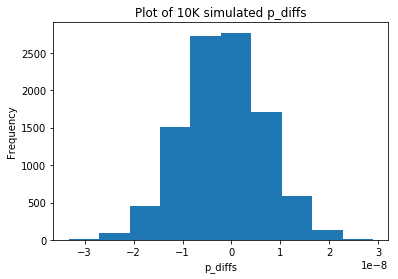

In [65]:
#Plot of p_diffs

p_diffs=np.array(p_diffs)

plt.hist(p_diffs);
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10K simulated p_diffs');


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [68]:
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
act_diff

-0.00157800000000001


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Answer

We are computing p-values here. From the above results,we found that old pages was doing marginally better than new treatment page.So,our null hypothesis is true as old and new pages perform similarly. 

Since, our critical value,α=0.05 and p-value is -0.15.So, our null hypothetis is true.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm
df2.head(5)

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [30]:
#Calculating z-score

from scipy.stats import norm
print(norm.cdf(z_score))

# Calculation with 95% confidence level
print(norm.ppf(1-(0.05)))


0.905058312759
1.64485362695


Answer:

We find that the z-score of 1.31092419842 and critical value is 1.64485362695. So, null hypothesis is accepted.We found that old pages was doing marginally better than new treatment page.
We agree with the findings in parts j. and k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df['intercept']=1
df[['control', 'treatment']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:

import  statsmodels.api  as sm
logit = sm.Logit(df['converted'],df[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 May 2018   Pseudo R-squ.:               8.077e-06
Time:                        18:46:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Answer:Our hypothesis here is:
H(0):pnew-pold=0
H(1):pnew-pold!=0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?


Answer:

We should consider other factors into the regression model as they might influence the conversions too. For instance student segments  might create change aversion or even, the opposite as a predisposition to conversion.  Timestamps are included but they do not indicate that it was a seasonality factor or not. 

The disadvantages of addidition additional terms into the regression model is that we can't take all influencing factor into consideration.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [34]:

count_df = pd.read_csv('countries.csv')
count_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [36]:
df.groupby('group').mean()['converted']

group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64

In [35]:
df_new = count_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [ ]:
#Concusion from Regression
#`As in this logistic regression model too, we find that the values do not show a substantial difference in teh conversion rates for control group and treatment group.
#This indicates that we can acceot the Null Hypothesis and keep the existing page as is.

<a id='conclusions'></a>
## Conclusions

From, all the methods it is clear that old pages were doing better than new pages.So, treatment wasn't that successful.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.